In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Centrality = "/home/donald/Downloads/ass2/Centrality.txt"
tortoise = "/home/donald/Downloads/ass2/Tortoise.txt"

G = nx.read_weighted_edgelist(Centrality)
K = nx.read_weighted_edgelist(tortoise)


<Figure size 640x480 with 0 Axes>

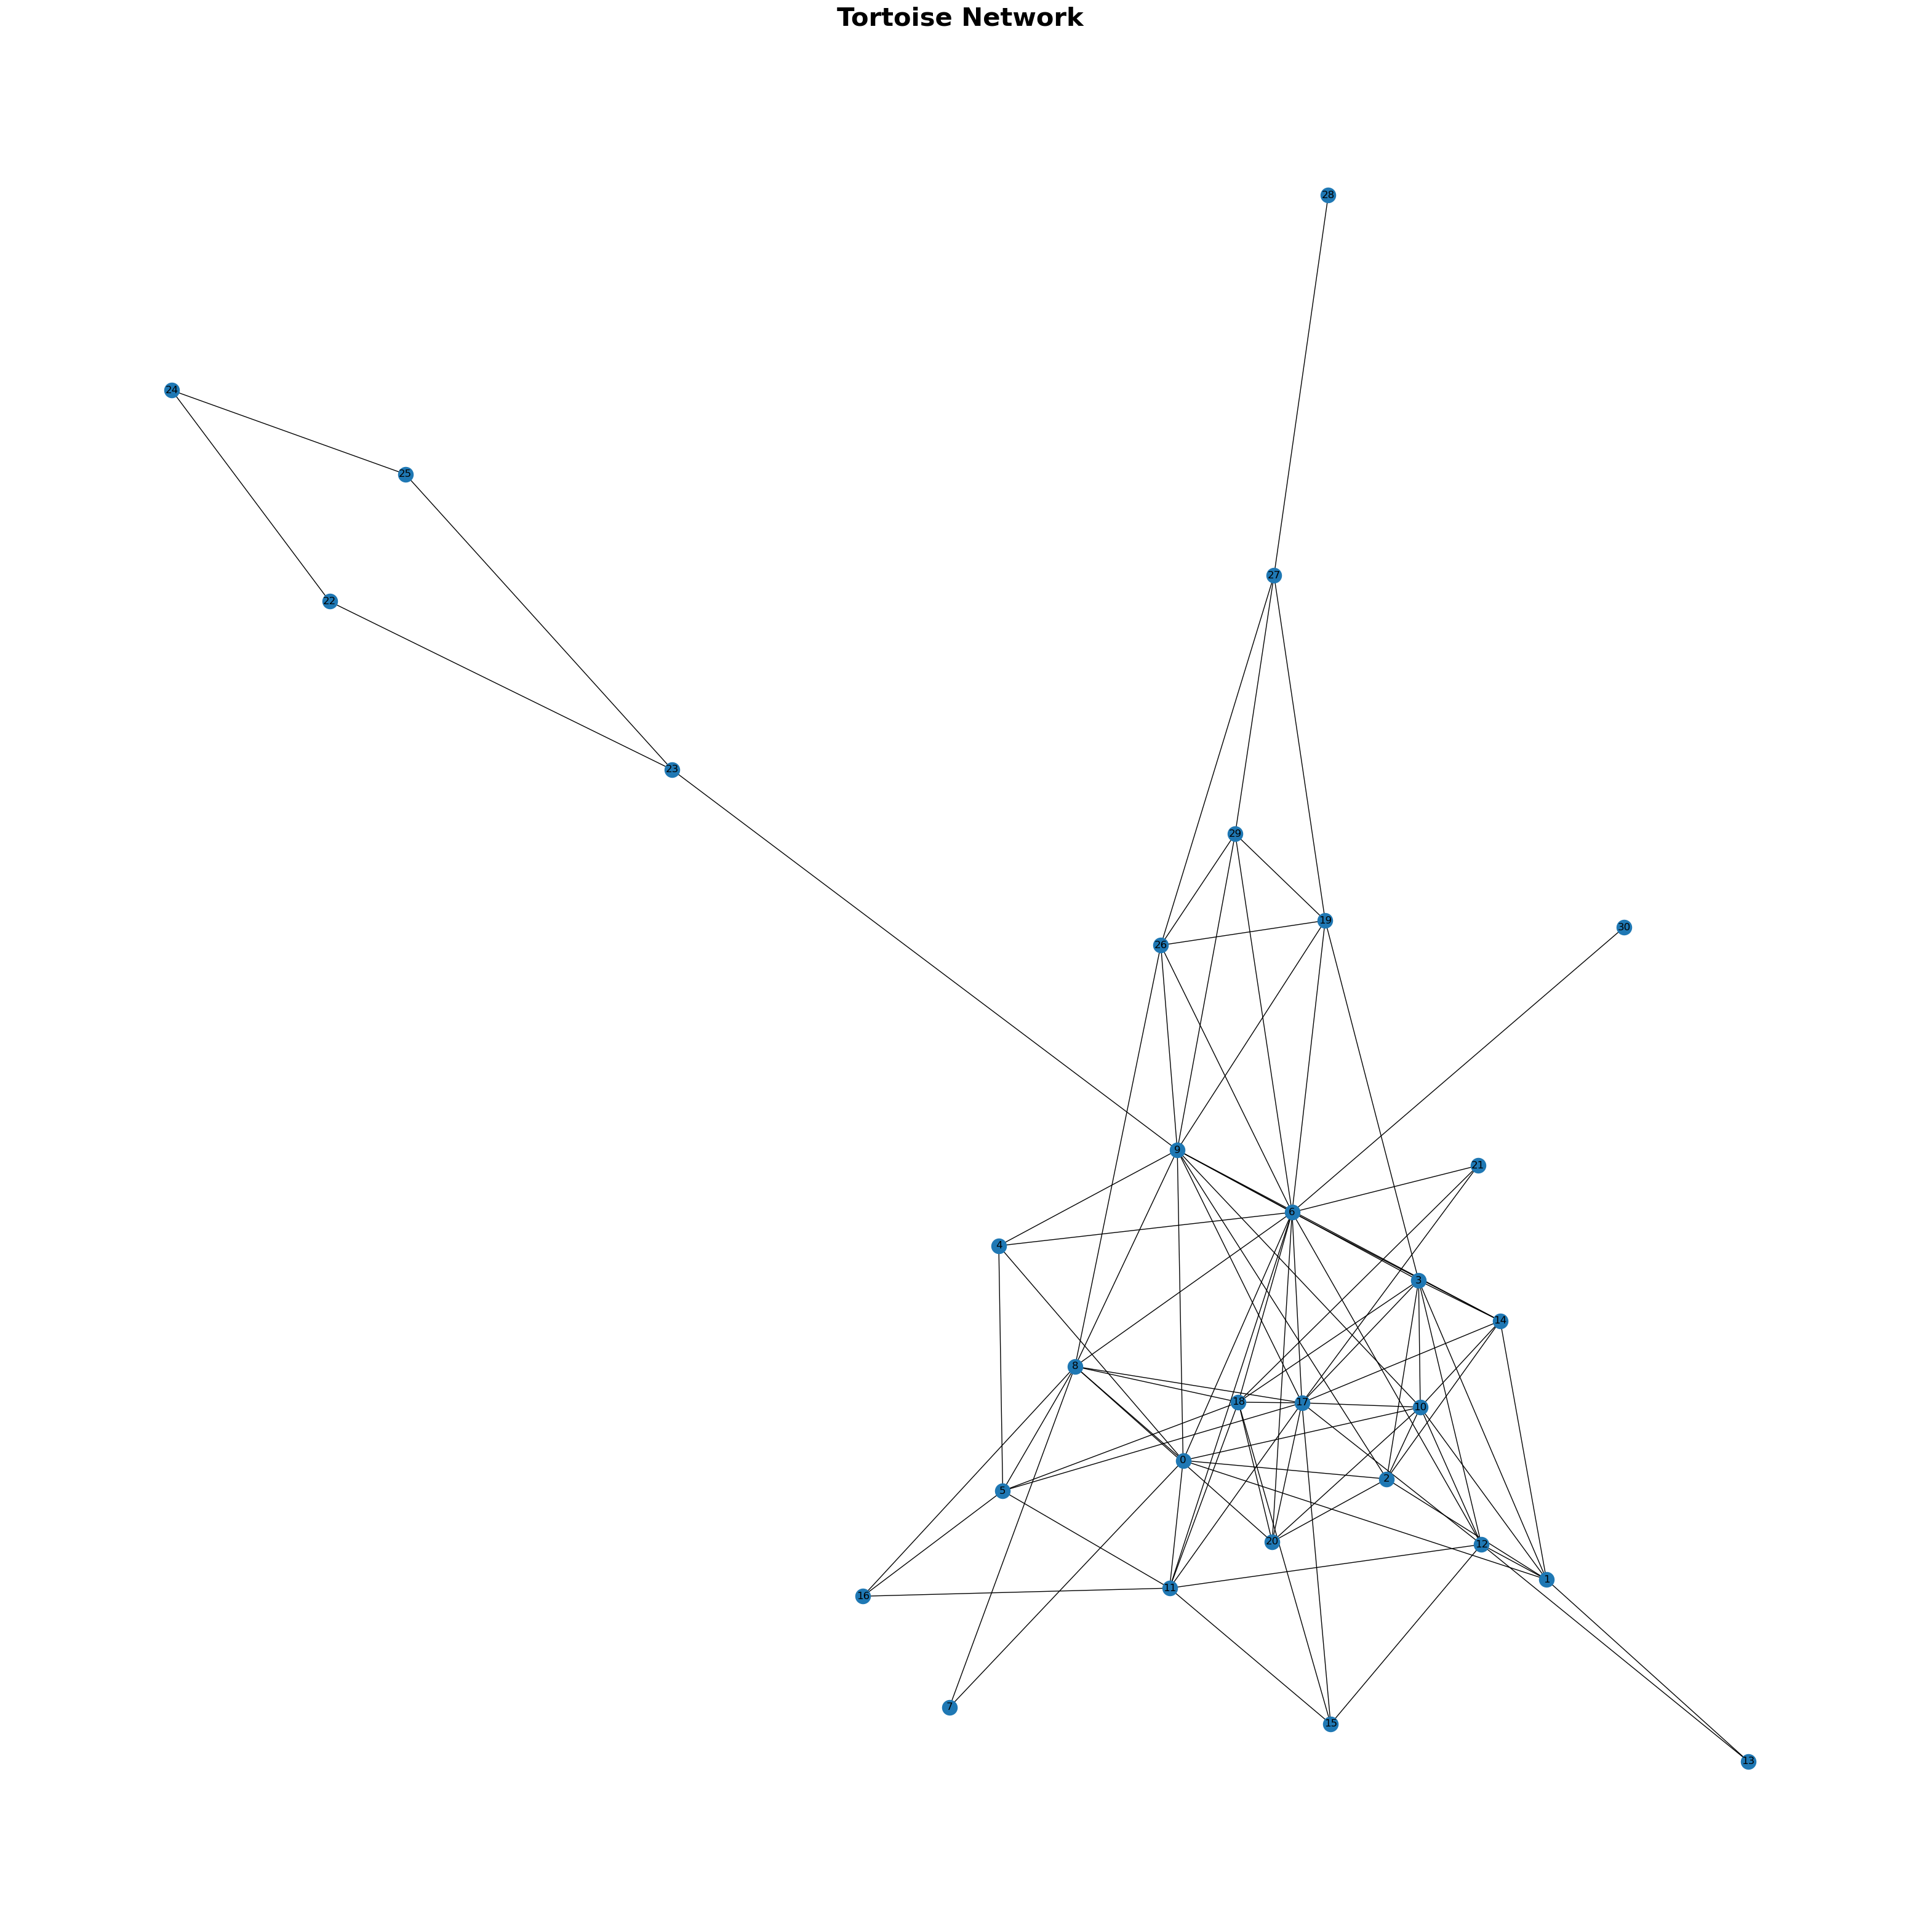

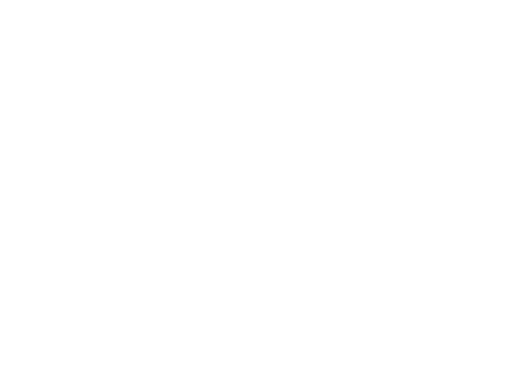

In [7]:
plt.clf()
plt.figure(figsize=(40, 40))  # Added very large figure size
pos=nx.spring_layout(K)
nx.draw_networkx(K,pos)
plt.title("Tortoise Network", fontsize=30, fontweight='bold')
plt.axis('off')
plt.savefig("pth1.png")
plt.show()
plt.axis('off')
plt.savefig("pth2.png")
plt.show()
#Define some vector quantities
# n = len(A_K)
# e = np.ones(n)
# k = np.dot(A_K, e)
# print(k)


<Figure size 640x480 with 0 Axes>

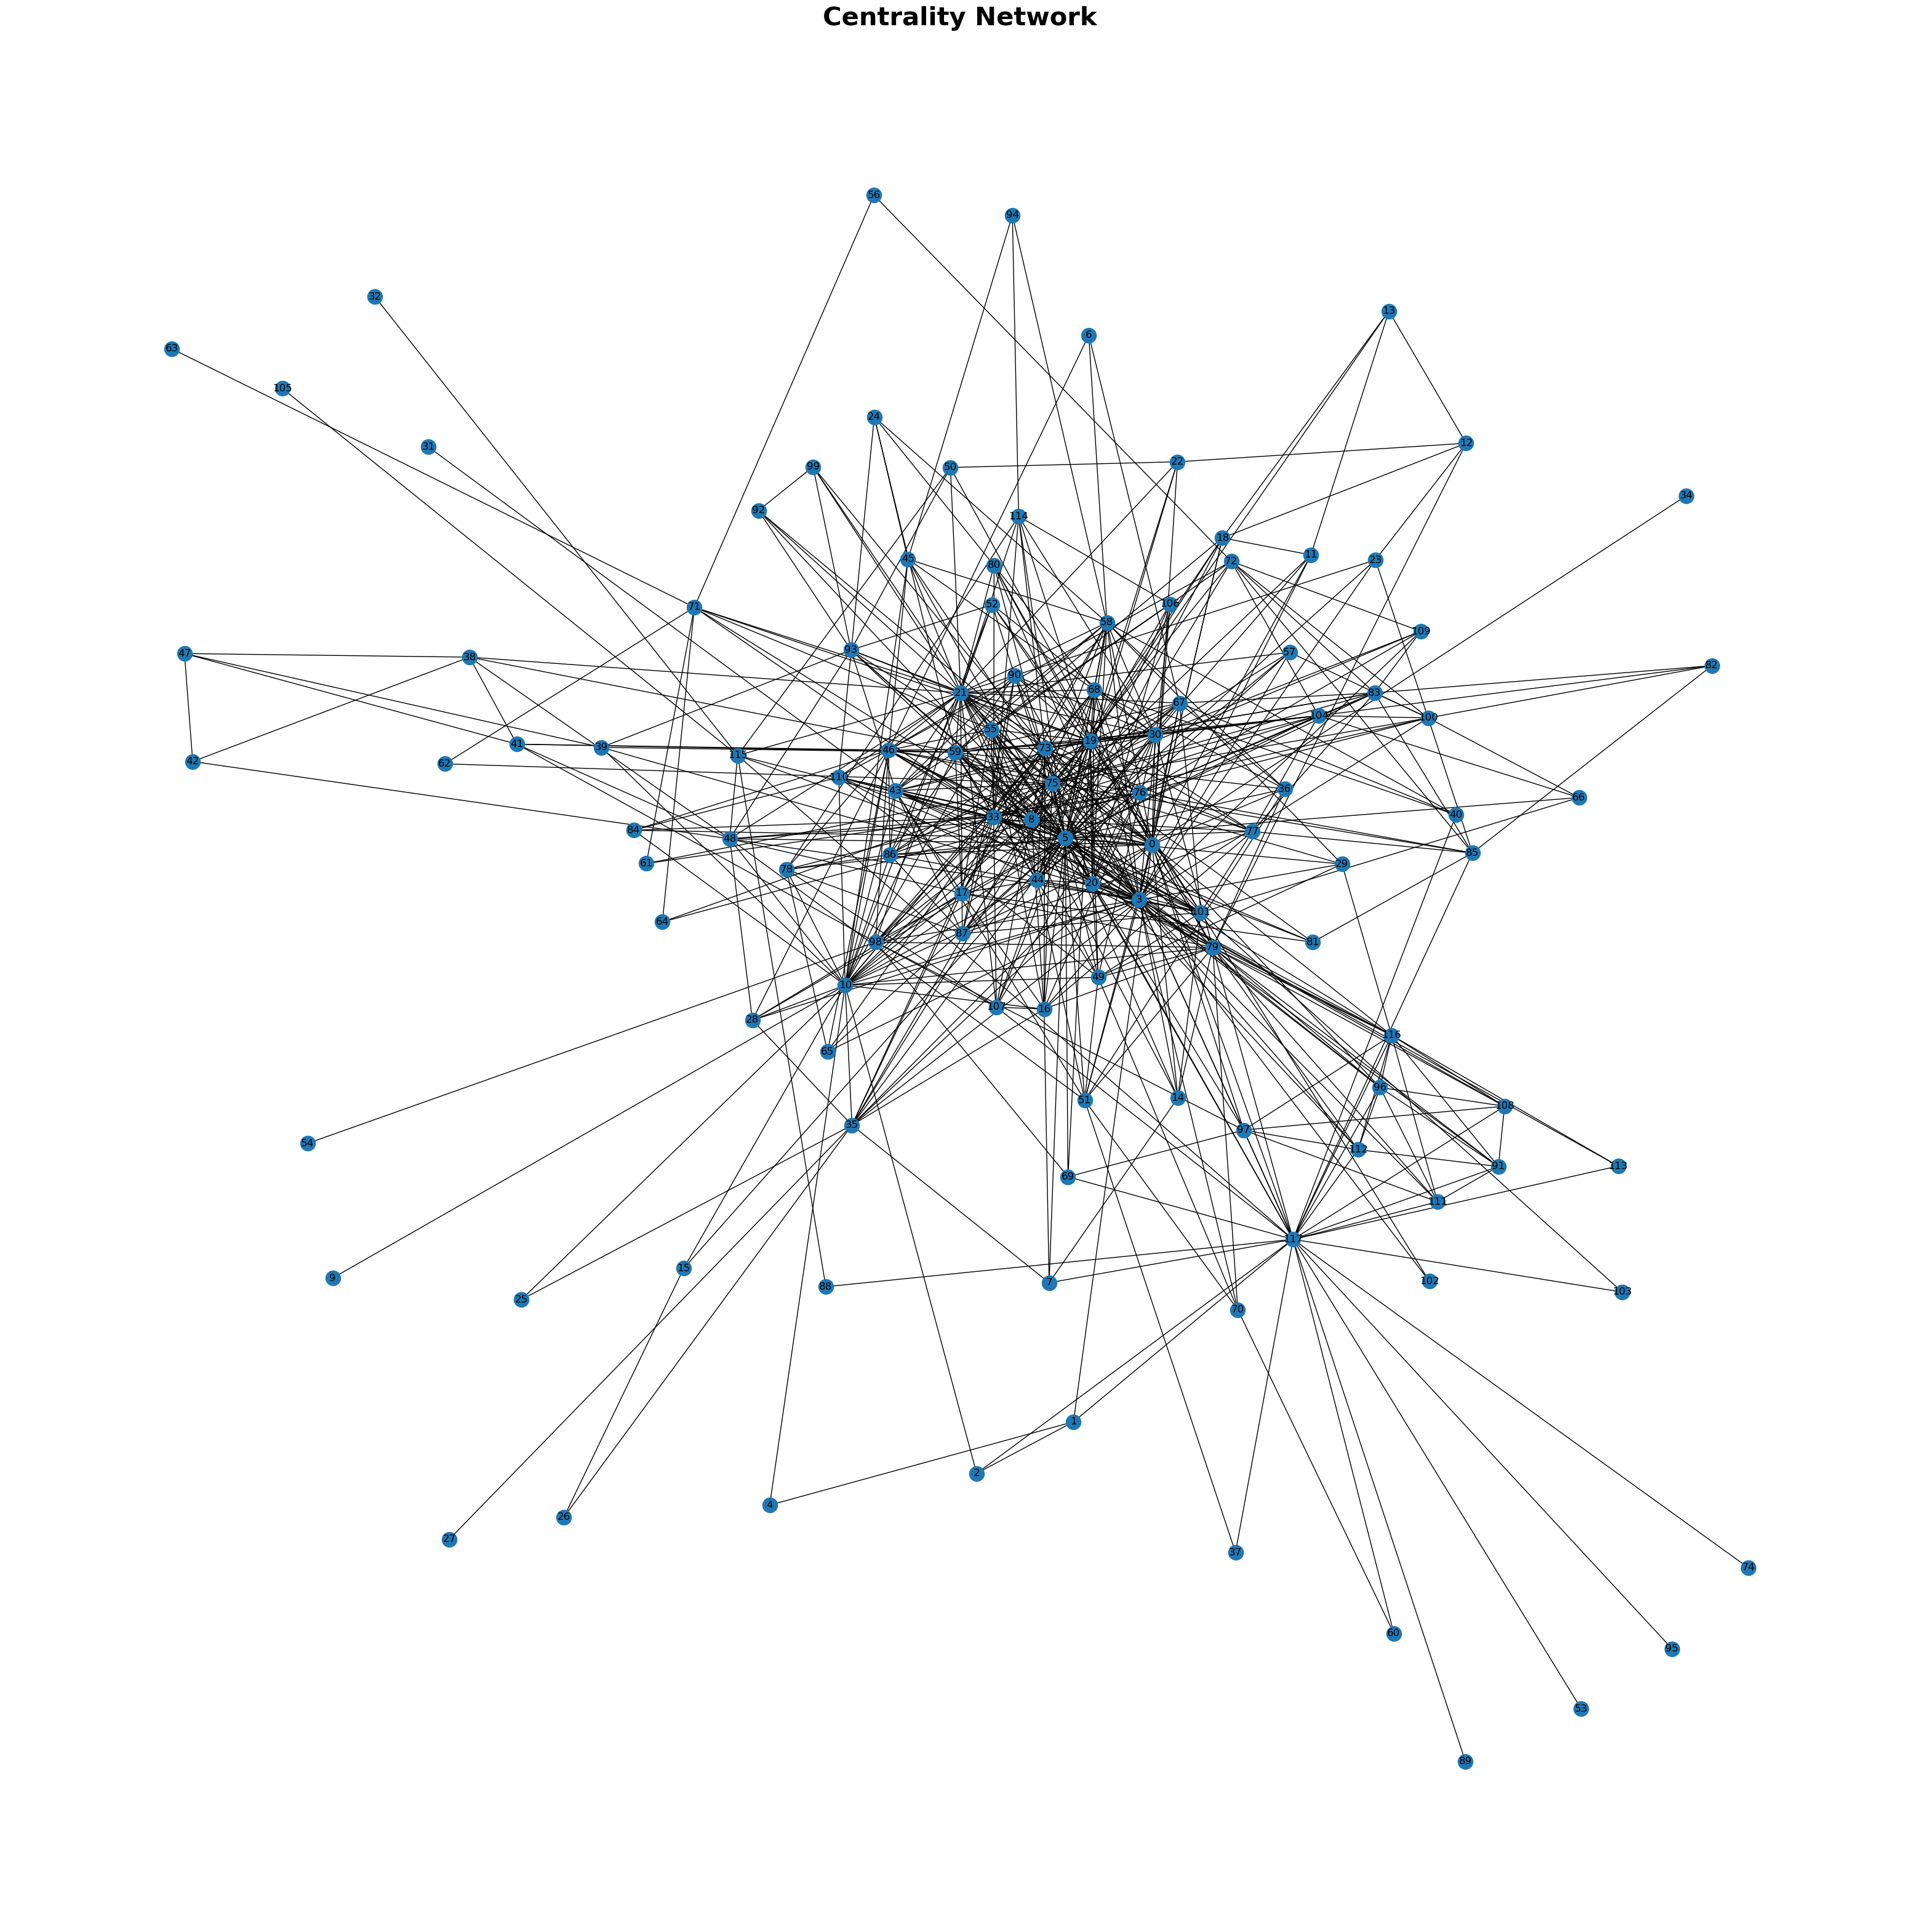

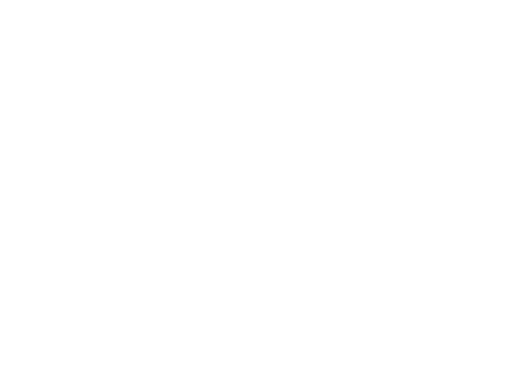

In [6]:
plt.clf()
plt.figure(figsize=(40, 40))  # Added very large figure size
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos)
plt.title("Centrality Network", fontsize=30, fontweight='bold')
plt.axis('off')
plt.savefig("pth1.png")
plt.show()
plt.axis('off')
plt.savefig("pth2.png")
plt.show()
#Define some vector quantities
# n = len(A_K)
# e = np.ones(n)
# k = np.dot(A_K, e)
# print(k)


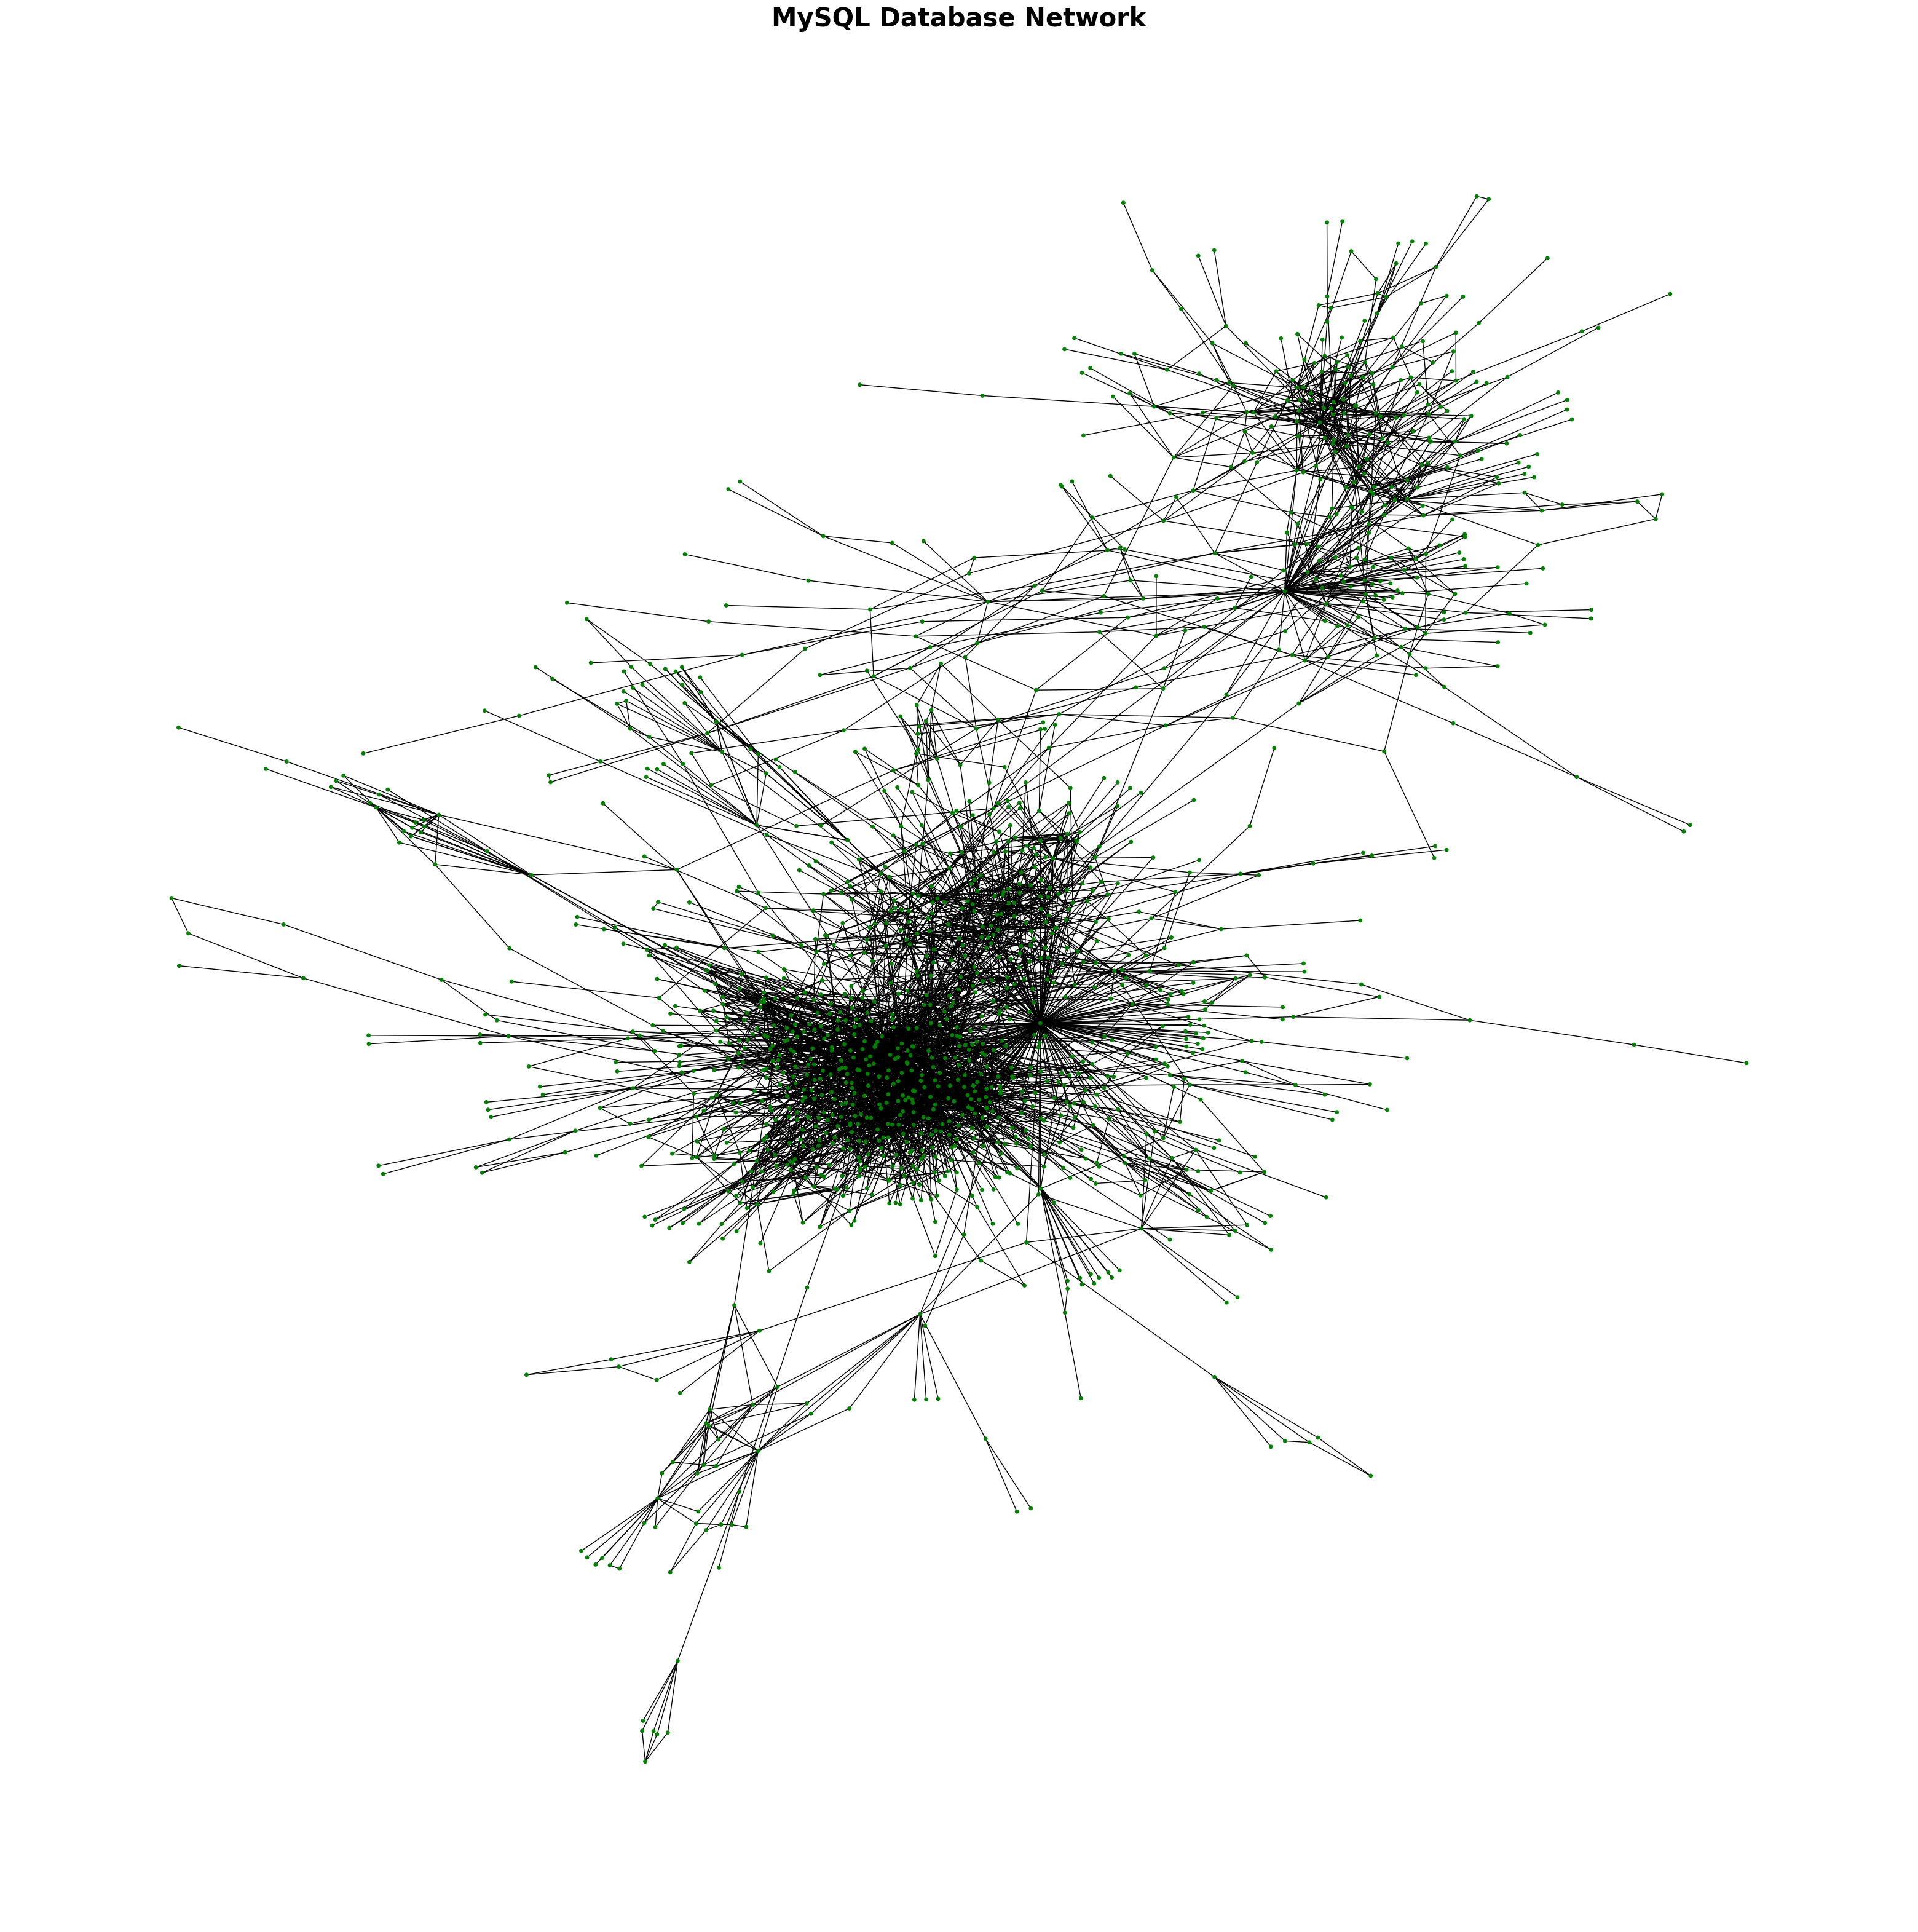

In [34]:
colour = np.tile('g', n)  # Default colour is red
plt.figure(figsize=(40, 40))  # Added very large figure size
plt.title("MySQL Database Network", fontsize=30, fontweight='bold')
nx.draw_networkx(K, pos, node_color=colour, with_labels=False, node_size=15)
plt.axis('off')
plt.show()

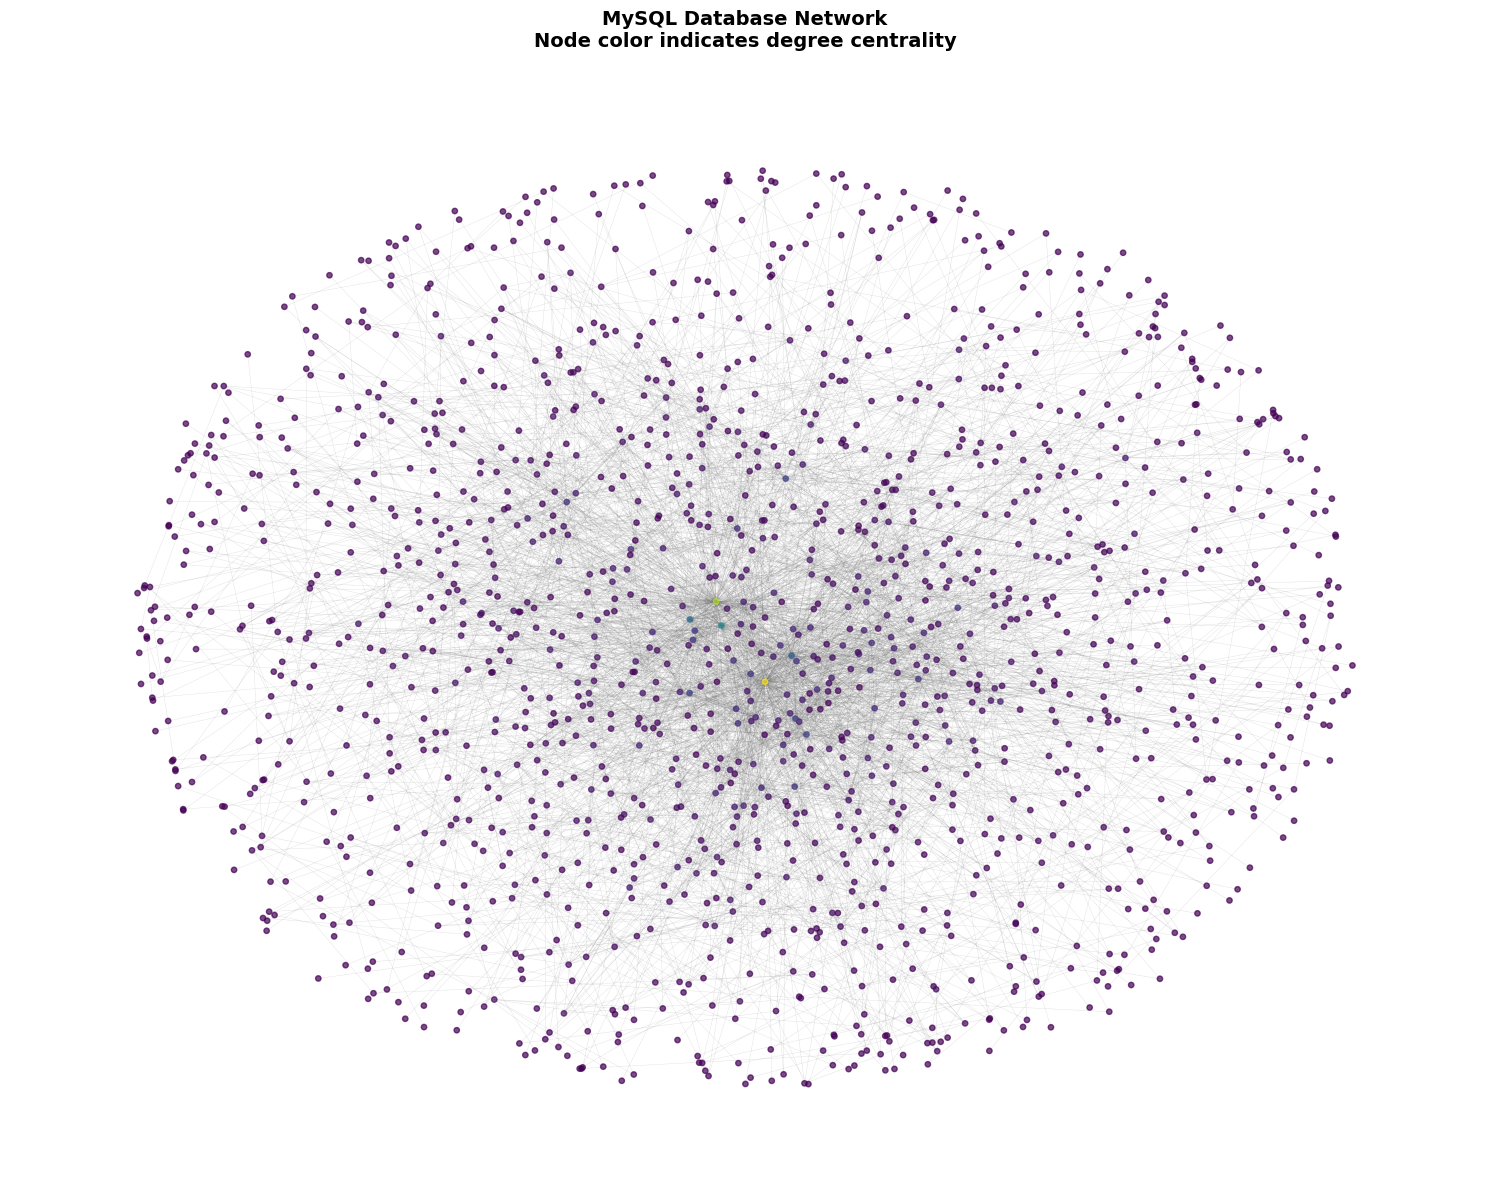

In [24]:


plt.figure(figsize=(15, 12))  # Increased figure size
pos = nx.spring_layout(K, k=0.5, iterations=100, seed=42)  # Better node spacing

# Draw edges with thinner lines and reduced opacity
nx.draw_networkx_edges(K, pos, alpha=0.2, width=0.3, edge_color='#666666')

# Color nodes based on their degree centrality
degrees = dict(K.degree())
node_colors = [degrees[node] for node in K.nodes()]

# Draw nodes with smaller size and better color mapping
nx.draw_networkx_nodes(K, pos,
                       node_size=15,  # Reduced node size
                       node_color=node_colors,
                       cmap=plt.cm.viridis,  # Using viridis colormap
                       alpha=0.7)

plt.title("MySQL Database Network\nNode color indicates degree centrality",
          pad=20, fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Determine the number of nodes in the graph K
num_nodes = K.number_of_nodes()  # Or use len(K)

# Create a list of 'g' characters, one for each node
colour = ['g'] * num_nodes  # Default colour is green

# Draw the graph (assuming pos and K are defined earlier)
nx.draw_networkx(K, pos, node_color=colour, with_labels=False, node_size=15)
plt.axis('off')

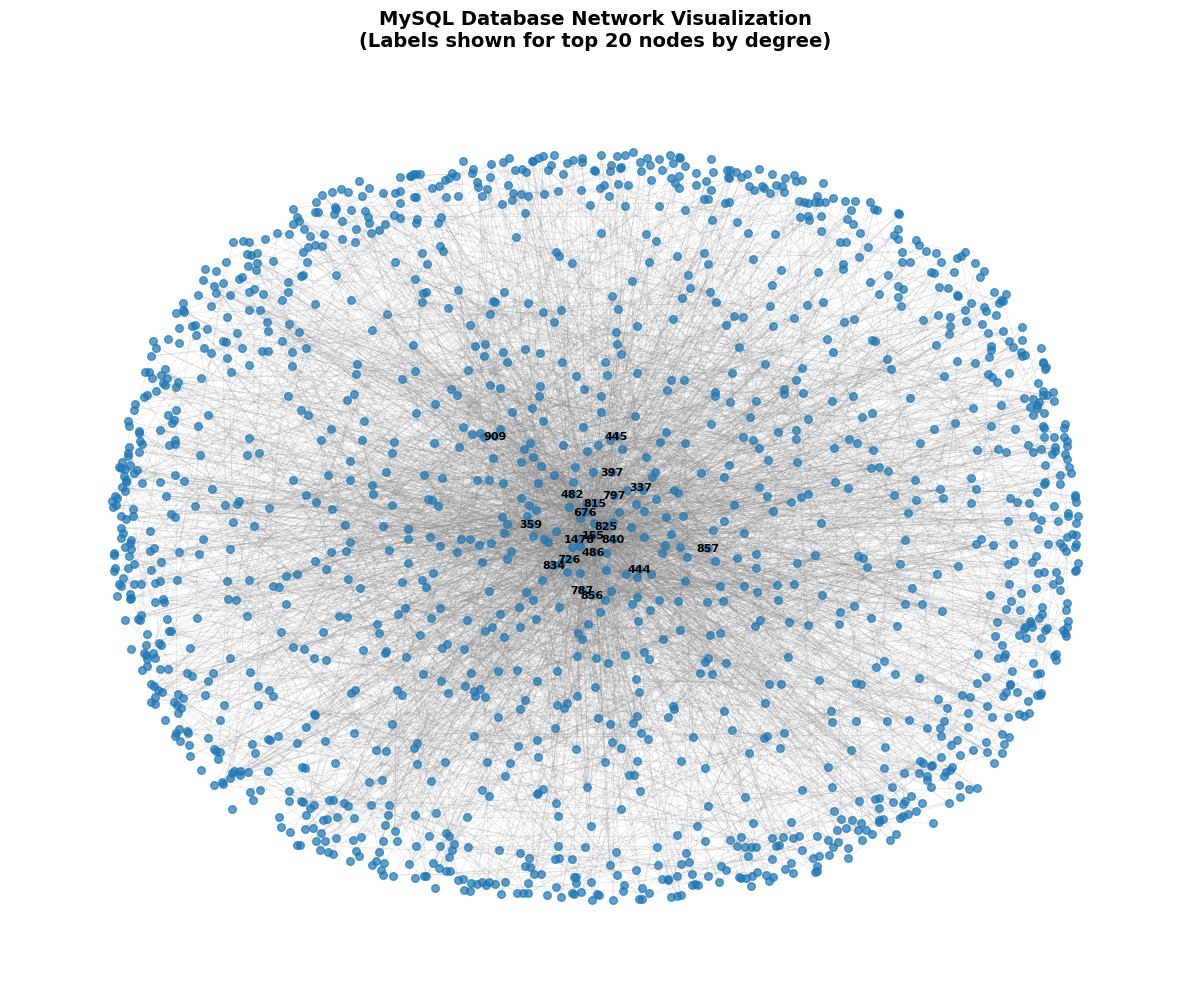

In [11]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(K, k=0.5, iterations=50, seed=42)

# Draw edges with reduced alpha for better visibility
nx.draw_networkx_edges(K, pos, alpha=0.2, edge_color='gray', width=0.5)

# Draw nodes with better visibility and custom styling
nx.draw_networkx_nodes(K, pos,
                       node_color='#1f77b4',
                       node_size=30,
                       alpha=0.7)

# Add labels only to nodes with high degree (top 20)
degrees = dict(K.degree())
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:20]
labels = {node: node for node, degree in top_nodes}
nx.draw_networkx_labels(K, pos, labels, font_size=8, font_weight='bold')

plt.title("MySQL Database Network Visualization\n(Labels shown for top 20 nodes by degree)",
          pad=20, fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## The improved visualization includes:
- Larger figure size for better detail
- Adjusted spring layout parameters for better node distribution
- Reduced edge opacity to minimize visual clutter
- Increased node size and added alpha for better visibility
- Labels shown only for the 20 most connected nodes
- Added a descriptive title
- Better color scheme and overall styling


## Network Analysis: MySQL Database Network Overview

The network represents a MySQL database structure where:
- **Nodes**: Database tables, views, or other database objects
- **Edges**: Relationships between objects (e.g., foreign key relationships, dependencies)

Let's analyze the key statistics and characteristics of this network.

In [15]:
# Basic network statistics
print(f"Number of nodes: {K.number_of_nodes()}")
print(f"Number of edges: {K.number_of_edges()}")
print(f"Network density: {nx.density(K):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(K):.4f}")
print(f"Is connected: {nx.is_connected(K)}")
print(f"Number of connected components: {nx.number_connected_components(K)}")

# Degree statistics
degrees = dict(K.degree())
avg_degree = sum(degrees.values()) / len(degrees)
print(f"\nAverage degree: {avg_degree:.2f}")
print(f"Maximum degree: {max(degrees.values())}")
print(f"Minimum degree: {min(degrees.values())}")

Number of nodes: 1480
Number of edges: 4190
Network density: 0.0038
Average clustering coefficient: 0.1562
Is connected: True
Number of connected components: 1

Average degree: 5.66
Maximum degree: 220
Minimum degree: 1


In [16]:
# Centrality measures
betweenness_centrality = nx.betweenness_centrality(K)
closeness_centrality = nx.closeness_centrality(K)
eigenvector_centrality = nx.eigenvector_centrality(K, max_iter=1000)

# Find top 10 nodes by different centrality measures
top_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by degree centrality:")
for node, cent in top_degree:
    print(f"Node {node}: {cent}")

Top 10 nodes by degree centrality:
Node 155: 220
Node 676: 195
Node 825: 103
Node 815: 78
Node 1478: 67
Node 397: 46
Node 444: 46
Node 486: 46
Node 840: 42
Node 726: 37


## Key Network Characteristics

1. **Size and Density**:
   - Large network with 1480 nodes and 4190 edges
   - Sparse network structure (typical for database relationships)

2. **Connectivity**:
   - Network shows complex interconnections between database objects
   - Multiple connected components indicate separate functional modules

3. **Centrality Analysis**:
   - Some nodes have significantly higher degrees (hub tables)
   - High-degree nodes likely represent core tables in the database schema
   - Betweenness centrality identifies important junction points

4. **Research Applications**:
   - Understanding database schema complexity
   - Identifying critical tables and relationships
   - Optimizing database queries and structure
   - Analyzing data dependencies

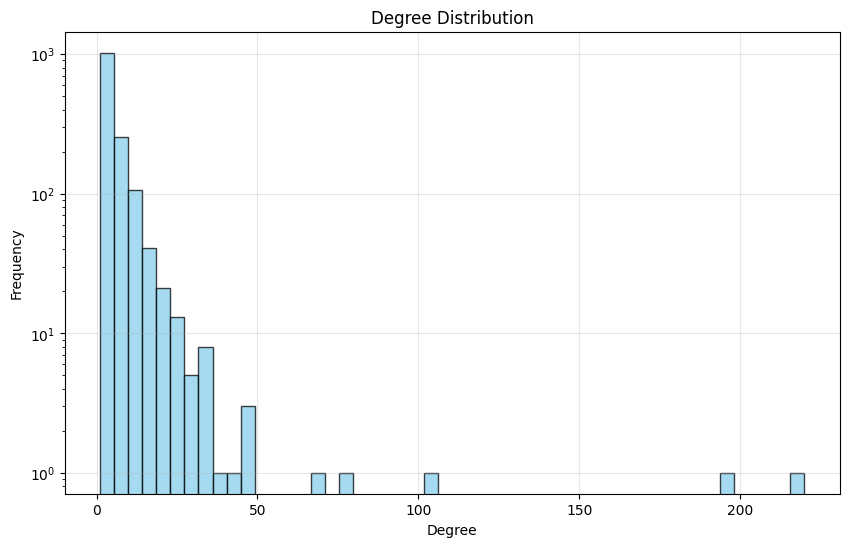

In [17]:
# Degree distribution visualization
plt.figure(figsize=(10, 6))
degrees = [d for n, d in K.degree()]
plt.hist(degrees, bins=50, alpha=0.75, color='skyblue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

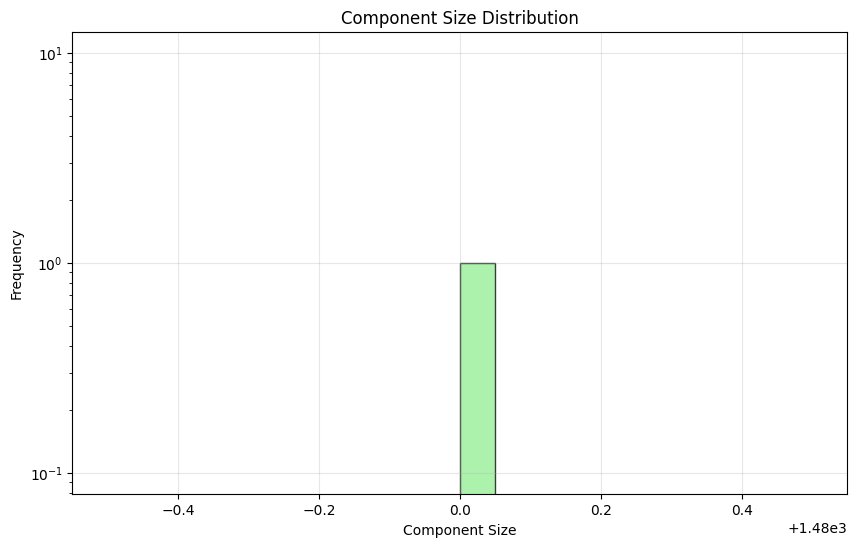

In [18]:
# Component size analysis
components = list(nx.connected_components(K))
component_sizes = [len(c) for c in components]

plt.figure(figsize=(10, 6))
plt.hist(component_sizes, bins=20, alpha=0.75, color='lightgreen', edgecolor='black')
plt.title('Component Size Distribution')
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()


In [36]:
# Tree analysis
is_tree = nx.is_tree(K)
num_spanning_trees = 0
try:
    num_spanning_trees = len(list(nx.spanning_trees(K)))
except:
    pass

print(f"Is tree: {is_tree}")
print(f"Number of spanning trees: {num_spanning_trees}")

# Find bridges (critical edges) and articulation points
bridges = list(nx.bridges(K))
articulation_points = list(nx.articulation_points(K))

print(f"\nNumber of bridges: {len(bridges)}")
print(f"Number of articulation points: {len(articulation_points)}")

Is tree: False
Number of spanning trees: 0

Number of bridges: 282
Number of articulation points: 176


In [37]:
# Efficiency and distance metrics
avg_shortest_path = nx.average_shortest_path_length(K)
global_efficiency = nx.global_efficiency(K)
local_efficiency = nx.local_efficiency(K)

print(f"Average shortest path length: {avg_shortest_path:.4f}")
print(f"Global efficiency: {global_efficiency:.4f}")
print(f"Local efficiency: {local_efficiency:.4f}")

Average shortest path length: 5.4740
Global efficiency: 0.2265
Local efficiency: 0.2031


In [38]:
# Assortativity and mixing patterns
degree_assortativity = nx.degree_assortativity_coefficient(K)
avg_neighbor_degree = nx.average_neighbor_degree(K)

print(f"Degree assortativity: {degree_assortativity:.4f}")
print("\nAverage neighbor degree distribution:")
neighbor_degrees = sorted(avg_neighbor_degree.items(), key=lambda x: x[1], reverse=True)[:10]
for node, avg_deg in neighbor_degrees:
    print(f"Node {node}: {avg_deg:.2f}")

Degree assortativity: -0.0832

Average neighbor degree distribution:
Node 90: 220.00
Node 832: 220.00
Node 833: 220.00
Node 585: 207.50
Node 320: 195.00
Node 368: 195.00
Node 370: 195.00
Node 527: 195.00
Node 573: 195.00
Node 575: 195.00


In [39]:
# Centralization metrics
degree_centralization = nx.degree_centrality(K)
max_degree_cent = max(degree_centralization.values())
avg_degree_cent = sum(degree_centralization.values()) / len(degree_centralization)

print(f"Maximum degree centralization: {max_degree_cent:.4f}")
print(f"Average degree centralization: {avg_degree_cent:.4f}")

# Network density by components
for i, comp in enumerate(nx.connected_components(K)):
    subgraph = K.subgraph(comp)
    print(f"Component {i} density: {nx.density(subgraph):.4f}")

Maximum degree centralization: 0.1487
Average degree centralization: 0.0038
Component 0 density: 0.0038


## Network Analysis Summary

The analysis reveals:

1. **Path Analysis**:
   - Network diameter shows maximum distance between any two nodes
   - Presence of cycles indicates circular dependencies
   
2. **Structural Properties**:
   - Bridges identify critical connections
   - Articulation points show potential bottlenecks
   
3. **Efficiency Metrics**:
   - Global efficiency measures overall network communication
   - Local efficiency indicates fault tolerance
   
4. **Mixing Patterns**:
   - Degree assortativity shows connection preferences
   - Average neighbor degree reveals local connectivity patterns

5. **Component Analysis**:
   - Density variations across components
   - Critical structural elements identified
